<a href="https://colab.research.google.com/github/Leostark95/Introduccion_IA/blob/main/content/NOTES%2004.01%20-%20DATA%20EXPLORATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04.01 - DATA EXPLORATION

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


## Based on [Kaggle House Pricing Prediction Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/)

- Inspect and learn from the competition [Notebooks](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/notebooks)
- You must make available to this notebook the `train.csv` file from the competition [data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) section. If running this notebook in Google Colab you must upload it in the notebook files section in Colab.

In [2]:
## KEEPOUTPUT
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
d = pd.read_csv("train.csv")
d.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


data size

In [3]:
## KEEPOUTPUT
print (d.shape)

(1460, 81)


Missing values in columns

In [4]:
## KEEPOUTPUT
k = d.isna().sum()
k[k!=0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


## Inspect the target variable

<ipython-input-5-342c03348c14>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['SalePrice']);


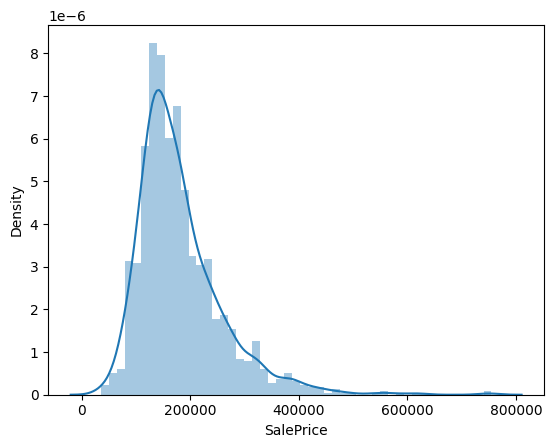

In [5]:
## KEEPOUTPUT
sns.distplot(d['SalePrice']);

## Discover data types

In [6]:
## KEEPOUTPUT
d.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
## KEEPOUTPUT
for c in d.columns:
    print ("%20s"%c, d[c].dtype)

                  Id int64
          MSSubClass int64
            MSZoning object
         LotFrontage float64
             LotArea int64
              Street object
               Alley object
            LotShape object
         LandContour object
           Utilities object
           LotConfig object
           LandSlope object
        Neighborhood object
          Condition1 object
          Condition2 object
            BldgType object
          HouseStyle object
         OverallQual int64
         OverallCond int64
           YearBuilt int64
        YearRemodAdd int64
           RoofStyle object
            RoofMatl object
         Exterior1st object
         Exterior2nd object
          MasVnrType object
          MasVnrArea float64
           ExterQual object
           ExterCond object
          Foundation object
            BsmtQual object
            BsmtCond object
        BsmtExposure object
        BsmtFinType1 object
          BsmtFinSF1 int64
        BsmtFinType2 objec

## Inspect numeric columns

In [8]:
## KEEPOUTPUT
d._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


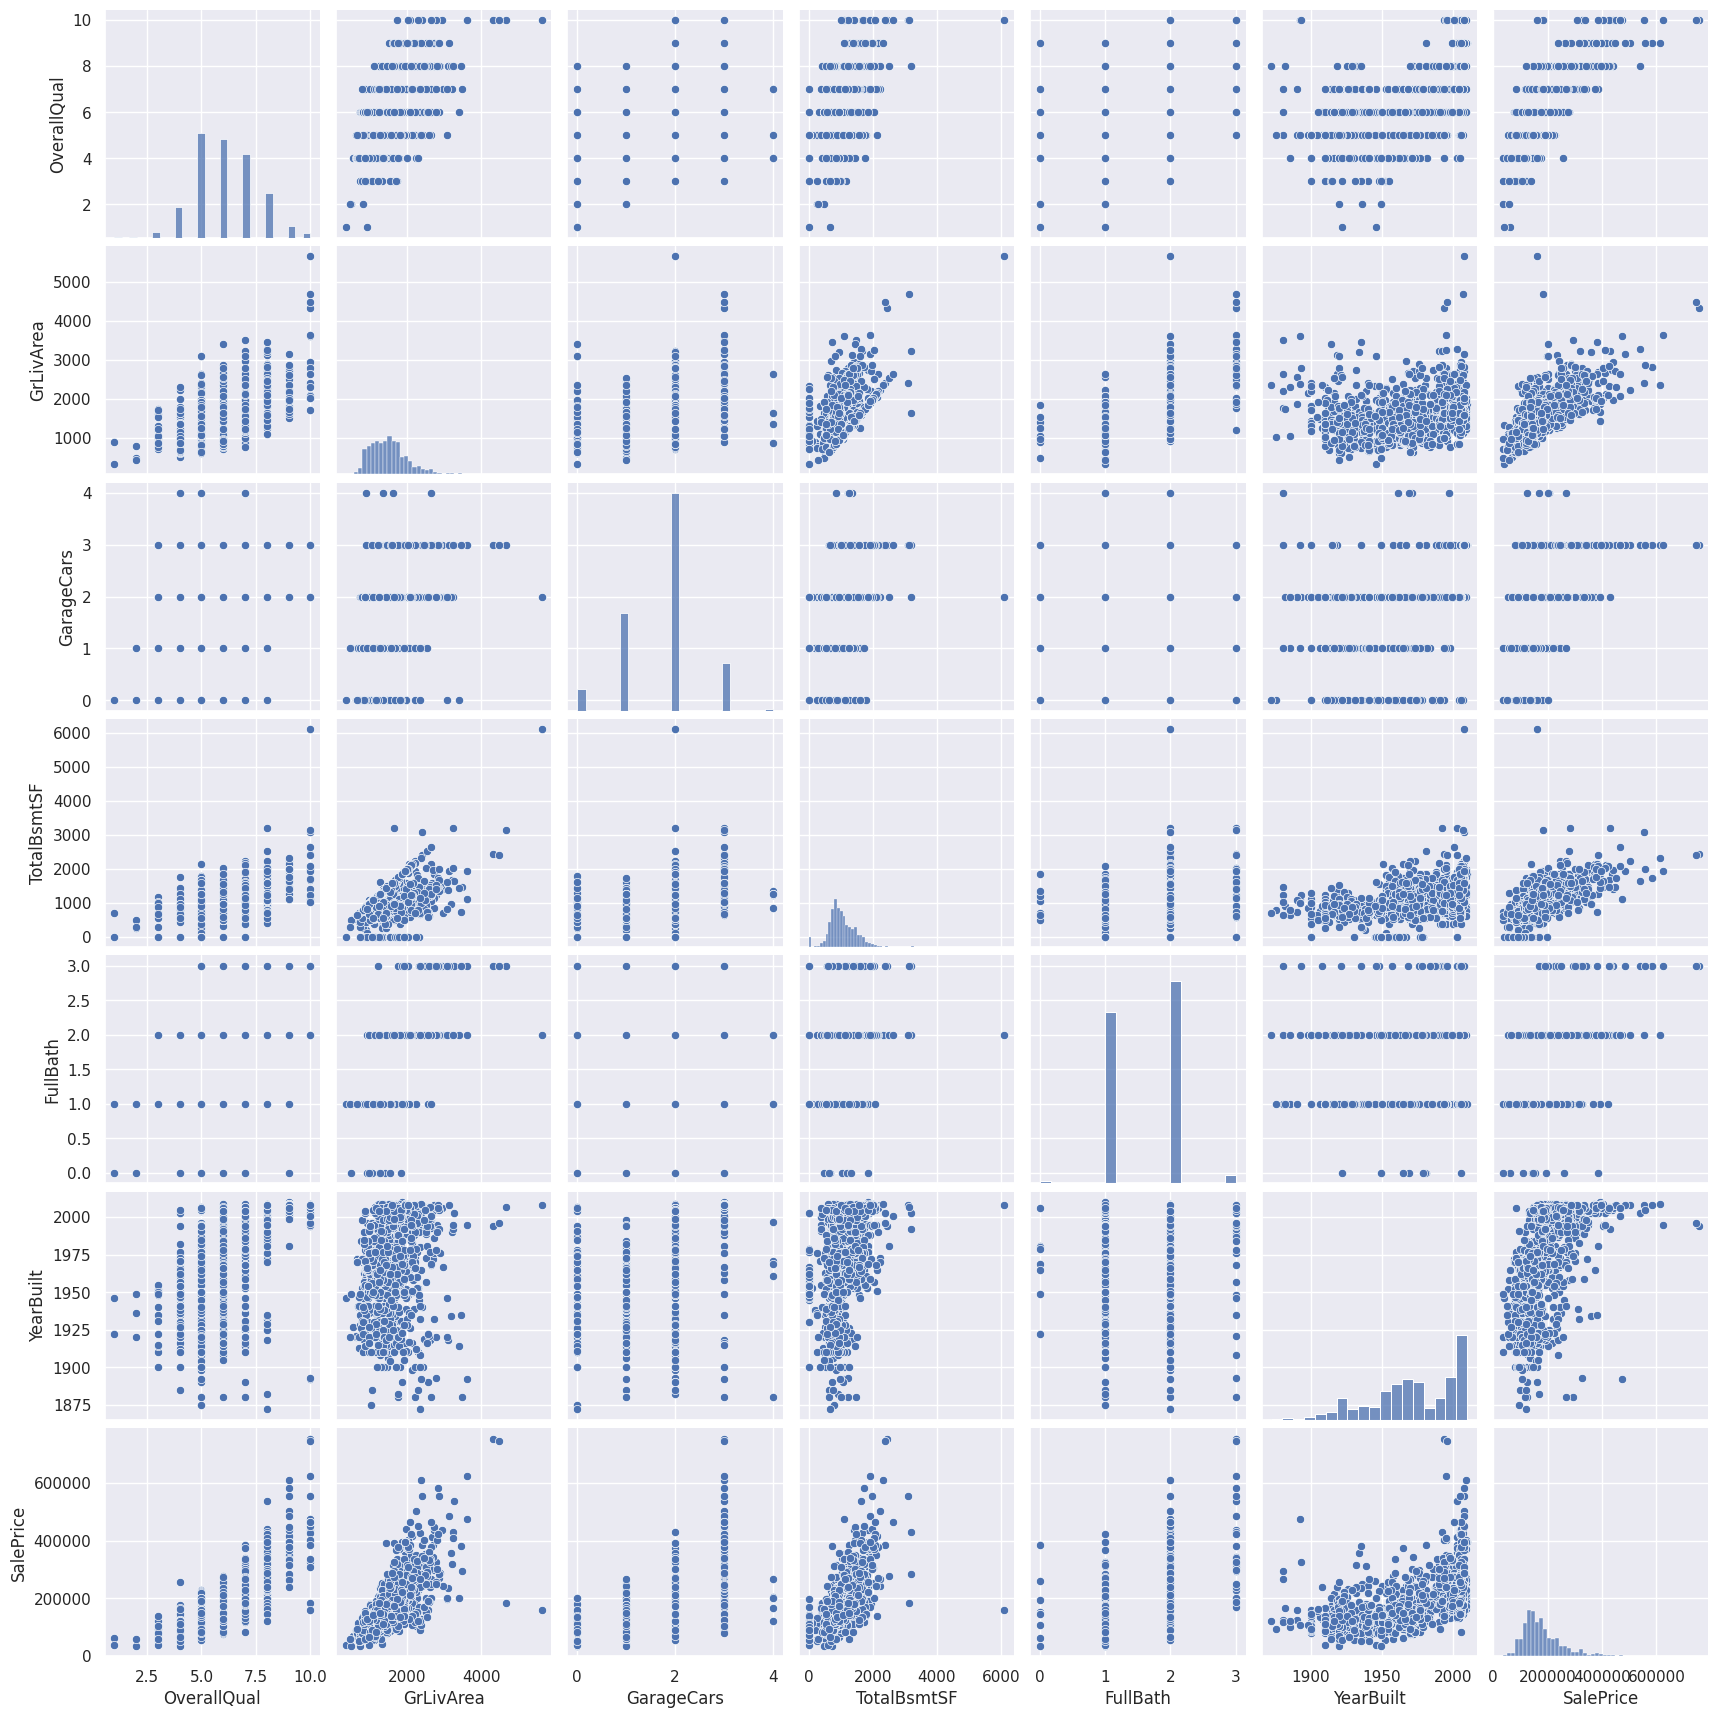

In [9]:
## KEEPOUTPUT
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']
#cols = np.unique(list(np.random.permutation(d._get_numeric_data().columns)[:5])+['SalePrice'])
sns.set()
sns.pairplot(d[cols])

### correlations

In [10]:
## KEEPOUTPUT
#correlation matrix
corrmat = d.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

ValueError: could not convert string to float: 'RL'

<Axes: >

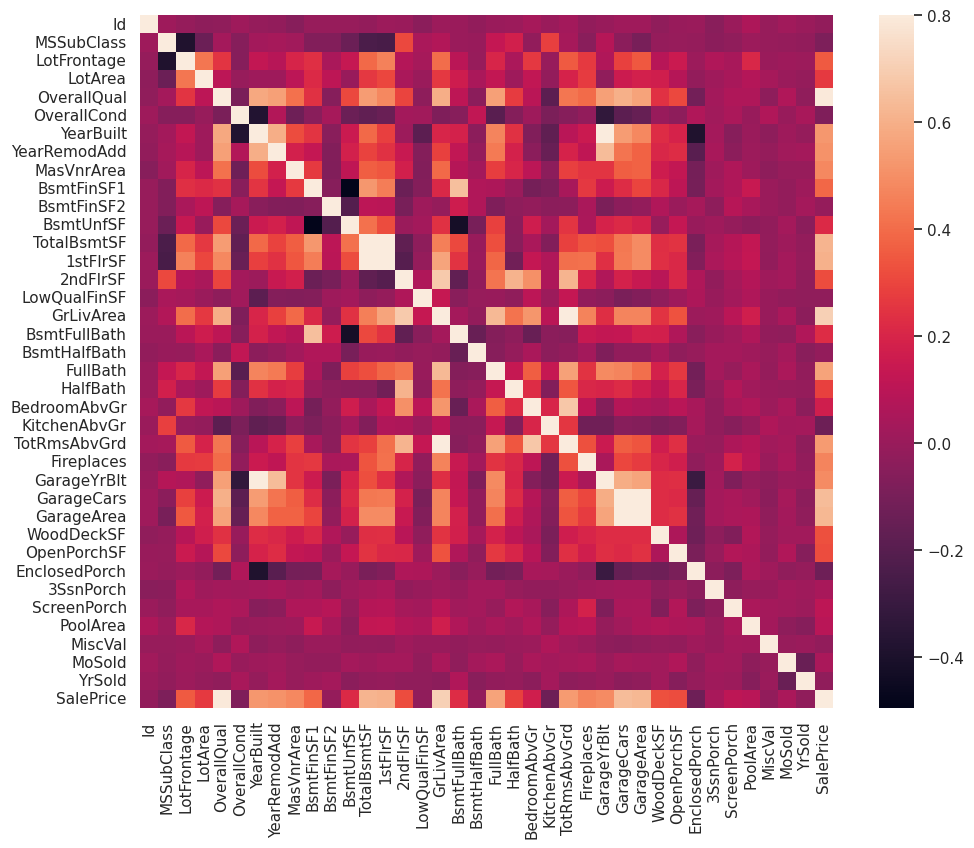

In [11]:
# Filtrar solo las columnas numéricas
numeric_data = d.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación solo para las columnas numéricas
corrmat = numeric_data.corr()

# Visualizar la matriz de correlación
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)


## Inspect categorical variables

In [12]:
## KEEPOUTPUT
ccols = [i for i in d.columns if not i in d._get_numeric_data()]
print (ccols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [13]:
## KEEPOUTPUT
for c in ccols:
    print ("%10s"%c, np.unique(d[c].dropna()))

  MSZoning ['C (all)' 'FV' 'RH' 'RL' 'RM']
    Street ['Grvl' 'Pave']
     Alley ['Grvl' 'Pave']
  LotShape ['IR1' 'IR2' 'IR3' 'Reg']
LandContour ['Bnk' 'HLS' 'Low' 'Lvl']
 Utilities ['AllPub' 'NoSeWa']
 LotConfig ['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
 LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
Condition1 ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']
Condition2 ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNn']
  BldgType ['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
HouseStyle ['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']
 RoofStyle ['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard' 'Shed']
  RoofMatl ['ClyTile' 'CompShg' 'Membran' 'Metal' 'Roll' 'Tar&Grv' 'WdShake'
 'WdShngl']
Exterior1st ['A

In [14]:
## KEEPOUTPUT
c="GarageType"
d[c].value_counts()

,count
GarageType,
Attchd,870
Detchd,387
BuiltIn,88
Basment,19
CarPort,9
2Types,6


<ipython-input-15-d8924f975c16>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.SalePrice[k[c]==v], label=v);
<ipython-input-15-d8924f975c16>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.SalePrice[k[c]==v], label=v);
<ipython-input-15-d8924f975c16>:7: UserWarning: 

`distplot` is a depr

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

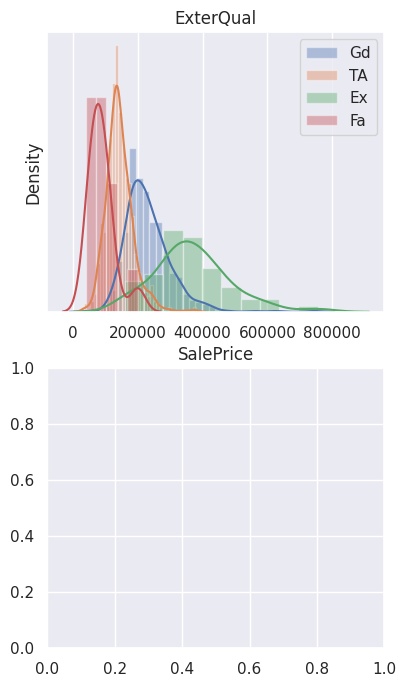

In [15]:
## KEEPOUTPUT
plt.figure(figsize=(20,8))
for i,c in enumerate(["ExterQual", "HouseStyle", "LandSlope", "Alley"]):
    plt.subplot(2,4,i+1)
    k=d[[c,"SalePrice"]].dropna()
    for v in d[c].dropna().unique():
        sns.distplot(k.SalePrice[k[c]==v], label=v);
        plt.title(c)
    plt.yticks([])
    plt.legend()
    plt.subplot(2,4,i+5)
    vc = k[c].value_counts()
    sns.barplot(vc.index, vc.values)
    plt.xticks(range(len(vc)), vc.index, rotation="vertical")

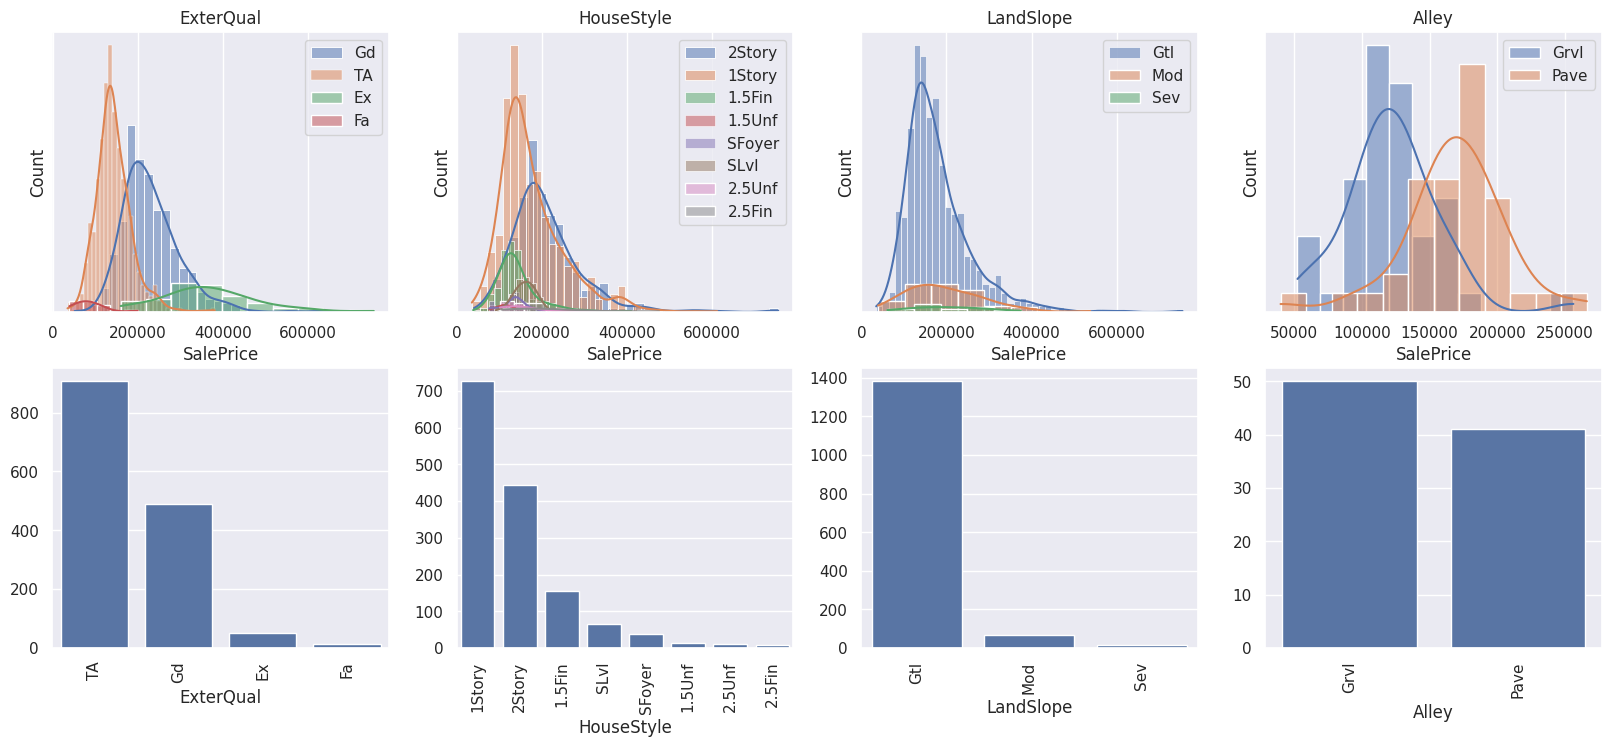

In [16]:
plt.figure(figsize=(20,8))
for i, c in enumerate(["ExterQual", "HouseStyle", "LandSlope", "Alley"]):
    plt.subplot(2,4,i+1)
    k = d[[c, "SalePrice"]].dropna()
    for v in d[c].dropna().unique():
        sns.histplot(k.SalePrice[k[c] == v], label=v, kde=True)  # Usar histplot en lugar de distplot
        plt.title(c)
    plt.yticks([])
    plt.legend()

    # Crear la siguiente gráfica
    plt.subplot(2,4,i+5)
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)  # Usar argumentos con nombre (x, y)
    plt.xticks(range(len(vc)), vc.index, rotation="vertical")


## Vision on mission values

Missing values in columns

In [17]:
## KEEPOUTPUT
k = d.isna().sum()
k[k!=0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


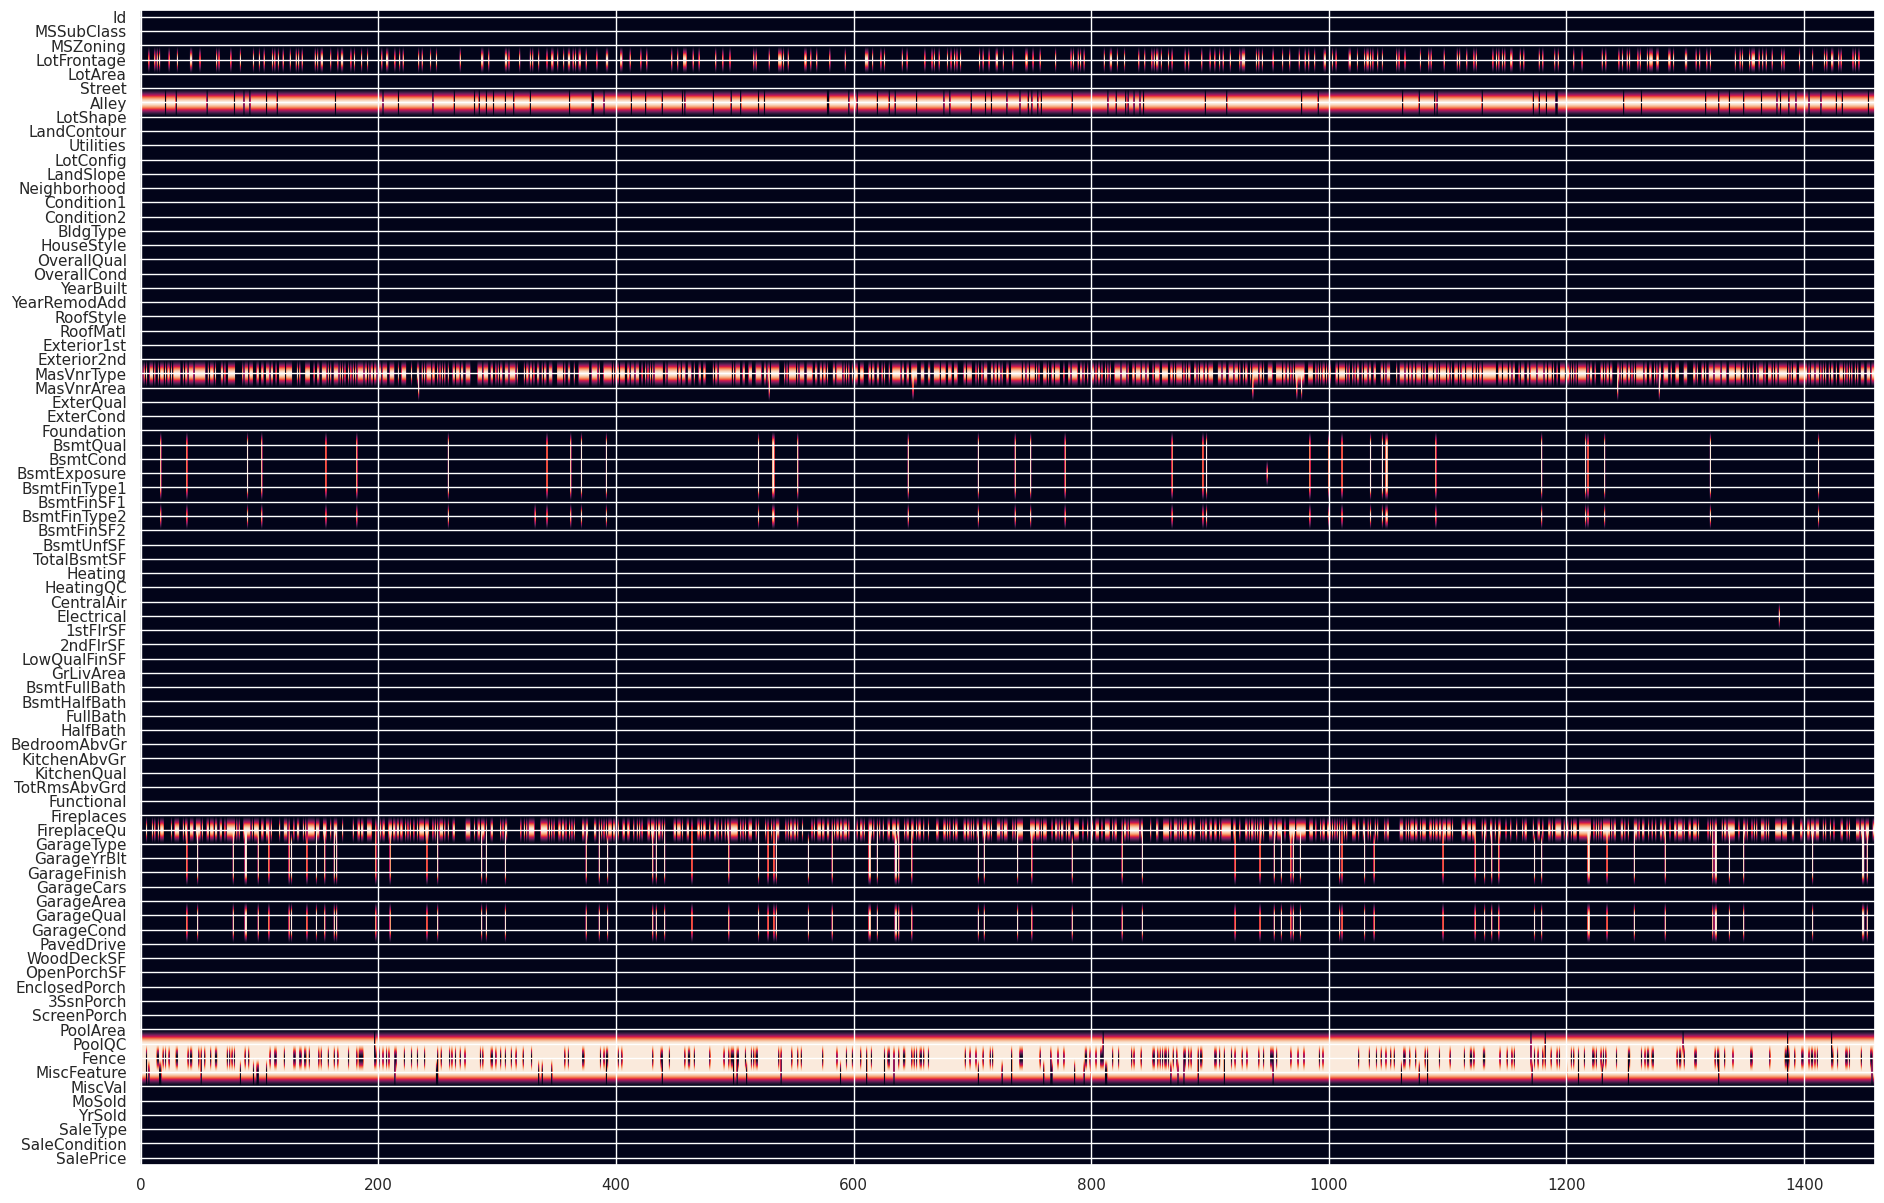

In [18]:
## KEEPOUTPUT
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(d.isna().values.T)
ax.set_aspect(12)
plt.yticks(range(d.shape[1]), d.columns);